# 로지스틱 회귀

인공지능의 기가 학습을 위해서는 문제와 그 문제가 참인지 거짓 인지 두 개의 선택지 중에서 정답을 고르는 문제가 많다. ex) 이것은 바나나인가 아닌가 등  이렇게 둘 중 하나를 결정하는 문제를 이진 분류(Binary Classification)라고 한다. 그리고 이런 문제를 학습시키기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다. 로지스틱 회귀에서는 시그모이드 함수 중 로지스틱 함수를 이용한다. 나는 이것을 수학적 수식으로 이미지화하고 로지스틱 함수 외에 다양한 시그모이드 함수를 구현해 볼 것이다.

# 로지스틱 회귀를 주제로 선정한 이유
- 로지스틱 회귀는 구현과 이해가 비교적 쉽고, 계산량도 적어서 비교적 빠르게 결과를 얻을 수 있다. 그렇지만 간단하다고 해서 성능이 나쁜 것은 아니다. 적절한 매개 변수 조정을 통해 성능을 향상시킬 수 있다.

- 로지스틱 회귀는 확률값을 계산하는 데에 시그모이드 함수를 사용한다. 시그모이드 함수는 0과 1 사이의 값을 반환하므로 이를 활용하여 이진 분류 문제에서 확률을 예측하는 데에 적합하다. 또한 시그모이드 함수를 이해하고 변형하는 과정은 신경망과 딥러닝 등 복잡한 모델을 이해하는 데에도 도움이 될 것 같아 선정하게 되었다.



# 로지스틱 함수 구현
> 인공지능에서는 시그모이드 함수 중 기본적으로 로지스틱 함수를 많이 사용한다.
> 그래서 로지스틱 함수와 시그모이드 함수는 거의 같은 의미라고 본다.
> 하지만 시그모이드 함수는 로지스틱 함수 하나만 있는 것은 아니다.


#시그모이드의 뜻
시그모이드의 의미는 무한히 미분할 수 있는 S자 모양의 함수들을 이르는 말이다. x가 +로 갈수록 증가하고 -로 갈수록 감소하는 형태의 함수가 부드럽게 연결되는 함수이다.


## 로지스틱함수 수식 이미지화

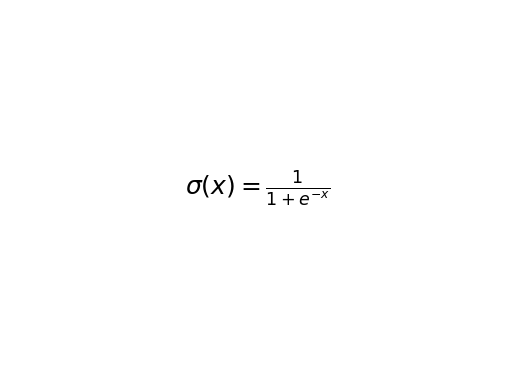

In [2]:
import matplotlib.pyplot as plt

plt.text(0.5, 0.5, r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', fontsize=18, ha='center')
plt.axis('off')
plt.savefig('sigmoid_equation.png', bbox_inches='tight')


## 로지스틱 함수 그래프

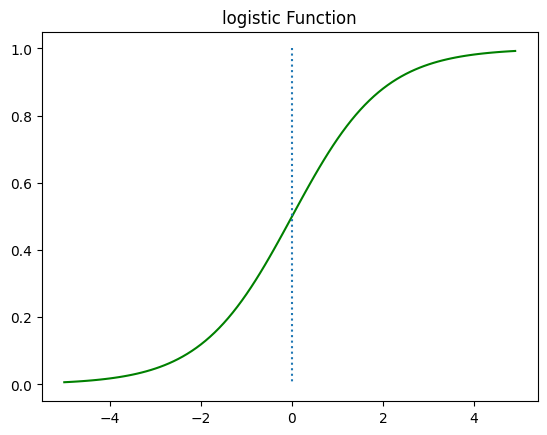

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):  #시그모이드 함수 생성
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('logistic Function')
plt.show()


## 로지스틱 함수 미분 식 이미지화

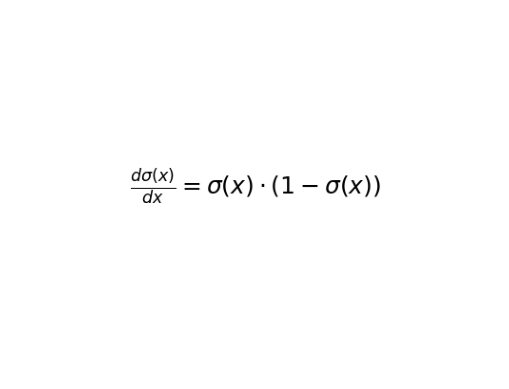

In [15]:
import matplotlib.pyplot as plt
from sympy import symbols, exp, diff
from sympy.printing import preview

x = symbols('x')
sigmoid_expr = 1 / (1 + exp(-x))
sigmoid_derivative_expr = diff(sigmoid_expr, x)

# 시그모이드 함수 미분 수식 이미지화
plt.text(0.5, 0.5, r'$\frac{d\sigma(x)}{dx} = \sigma(x) \cdot (1 - \sigma(x))$', fontsize=18, ha='center')
plt.axis('off')
plt.savefig('sigmoid_derivative_equation.png', bbox_inches='tight')
plt.clf()


plt.imshow(plt.imread('sigmoid_derivative_equation.png'))
plt.axis('off')
plt.show()


## 로지스틱 함수의 미분(도함수)


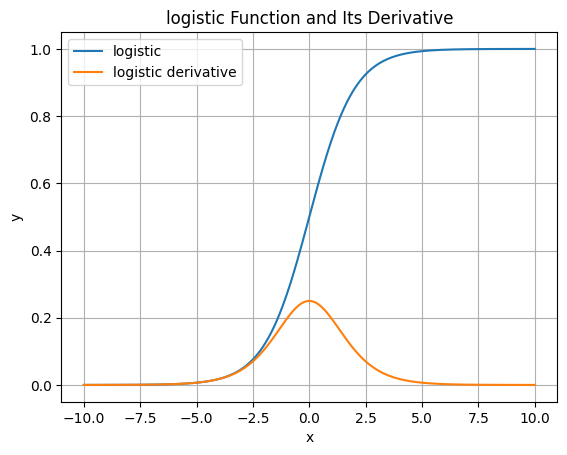

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_derivative = sigmoid_derivative(x)

plt.plot(x, y_sigmoid, label='logistic')
plt.plot(x, y_derivative, label='logistic derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.title('logistic Function and Its Derivative')
plt.legend()
plt.grid(True)
plt.show()


# 매개변수의 변화

> 매개변수의 변화를 통해서 자신이 원하는 모델을 제작할 수 있다.
매개변수(parameter)의 변화를 통해 원하는 모델을 제작하는 것은 기계 학습과 딥러닝에서 중요한 과정 중 하나이다. 모델의 성능과 특성은 모델의 매개변수에 의해 결정되기 때문에 이를 적절하게 조정하면 원하는 결과를 얻을 수 있다.

## w의 변화


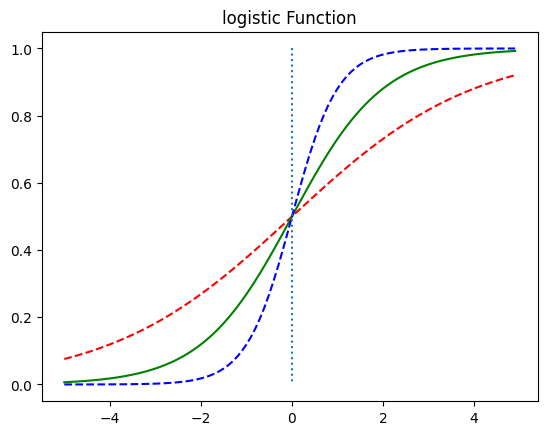

In [48]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('logistic Function')
plt.show()

## b값의 변화

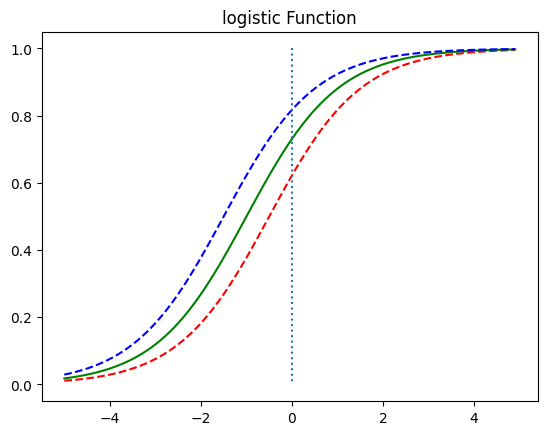

In [47]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('logistic Function')
plt.show()

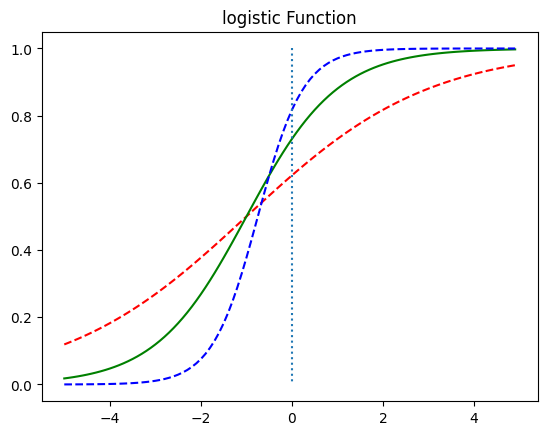

In [49]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(2*x+1.5)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0], ':')
plt.title('logistic Function')
plt.show()

# 매개변수 예시
경사 하강법(Gradient Descent): 모델의 성능을 평가하여 손실 함수를 최소화하는 방향으로 매개변수를 조정하는 방법이다. 주어진 데이터에 대해 손실 함수를 정의하고 이를 최소화하기 위해 매개변수를 업데이트하는 과정을 반복한다.

gradient : 0.019333333333333334 y-intercept: 0.004
gradient : 0.038316888888888886 y-intercept: 0.007925111111111112
gradient : 0.05695700407407407 y-intercept: 0.01177669074074074
gradient : 0.07525990147074074 y-intercept: 0.015556071701728395
gradient : 0.0932316909156749 y-intercept: 0.019264562657967284
gradient : 0.11087837154339066 y-intercept: 0.022903448561951843
gradient : 0.1282058337919114 y-intercept: 0.026473991084397457
gradient : 0.1452198613722088 y-intercept: 0.029977429036076052
gradient : 0.16192613320195823 y-intercept: 0.033414978782008546
gradient : 0.1783302253042569 y-intercept: 0.03678783464815269
gradient : 0.1944376126719399 y-intercept: 0.04009716932072226
gradient : 0.21025367109811696 y-intercept: 0.0433441342382711
gradient : 0.2257836789735426 y-intercept: 0.04652985997667306
gradient : 0.24103281905142004 y-intercept: 0.04965545662712673
gradient : 0.2560061801802293 y-intercept: 0.052722014167311065
gradient : 0.2707087590051585 y-intercept: 0.0557306

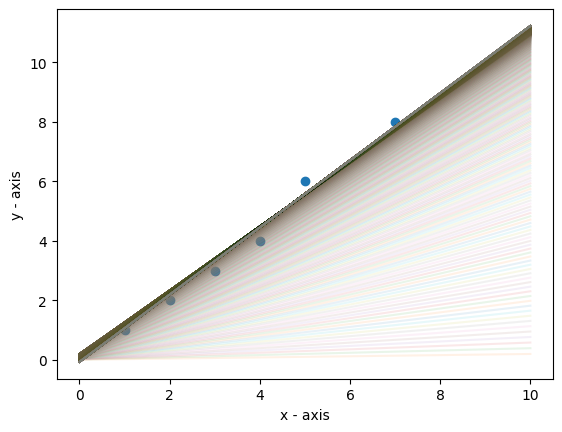

In [25]:
import numpy as np

# Gradient descent

# input (1,2,3,4,5,7) x
# output (1,2,3,4,6,8) y

x = [1,2,3,4,5,7]
y = [1,2,3,4,6,8]
learning_rate = 0.001
# plotting function

import matplotlib.pyplot as plt


def display_graph(x, y):
    plt.plot(x, y, 'o')
    # naming the x axis
    plt.xlabel('x - axis')
    # naming the y axis
    plt.ylabel('y - axis')

display_graph(x, y)

def line_graph (g, b):
    x = np.linspace(0, 10, 10)
    y = g * x + b
    plt.plot(x, y, alpha = 0.1)



# gradient descent function

def gradient_descent(x, y):

    w = 0
    b = 0

    # y ? f(x): wx + b

    for epoch in range (3000):

        gradient_w_sum = 0
        gradient_b_sum = 0

        for i in range (len(x)):
            y_hat = w * x [i] + b

        # 기울기는 ob_f의 미분값
            gradient_w = (y_hat - y [i]) * x[i]
            gradient_w_sum = gradient_w_sum + gradient_w

            gradient_b = ( y_hat - y[i])
            gradient_b_sum = gradient_b_sum + gradient_b

        # w = w - learning_rate * gradient
        # 기울기를 구해서 업데이트

        w = w - learning_rate * gradient_w_sum / len(x)
        b = b - learning_rate * gradient_b_sum / len(x)
        print (f"gradient : {w} y-intercept: {b}")
        line_graph (w, b)

# 최적화된 w, b

    return w, b

w, b  = gradient_descent(x, y)

print (f"weight: {w}, bias: {b}")


# epoch 만큼 파라미터를 업데이트


# 다양한 형태의 시그모이드 함수


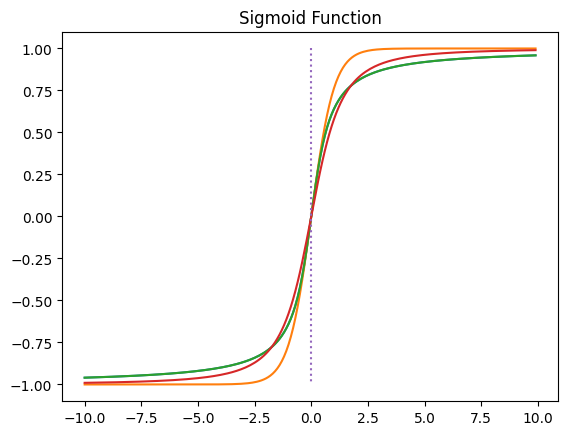

In [24]:
from torch.nn.modules.module import register_module_buffer_registration_hook
import numpy as np
import matplotlib.pyplot as plt

def sigmoid1(x):
    return 2/np.pi*np.arctan(np.pi/2*x)

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def arctan(x):
    return 2/np.pi*np.arctan(np.pi/2*x)

def xr(x):
    return x / np.sqrt(2 + x**2)

def e(x):
    return np.exp(-1/x**2*(np.exp(-1/(x-1)**2)))


x = np.arange(-10.0, 10, 0.1)

y = sigmoid1(x)
plt.plot(x, y)

y = tanh(x)
plt.plot(x, y)

y = arctan(x)
plt.plot(x, y )

y = xr(x)
plt.plot(x,y)



plt.plot([0,0],[1.0,-1.0], ':')

plt.title('Sigmoid Function')

plt.show()
